<a href="https://colab.research.google.com/github/Vianneydsouza/Applied-Statistics/blob/main/Ensemble_Techniques_Project_Vianney_Dsouza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Done Using Google Colab

###1. Data Understanding and Exploration

####A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.
####B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

In [140]:
#lets import basic libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
tel1 = pd.read_csv('/content/drive/MyDrive/python/CSV/TelcomCustomer-Churn_1.csv')
tel2 = pd.read_csv('/content/drive/MyDrive/python/CSV/TelcomCustomer-Churn_2.csv')

In [143]:
tel1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes


In [144]:
tel1.shape

(7043, 10)

In [145]:
tel2.head(10)

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [146]:
tel2.shape

(7043, 12)

####C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [147]:
tel = pd.merge(tel1, tel2, how='outer', on='customerID')

In [148]:
tel.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [149]:
tel.shape

(7043, 21)

In [150]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [151]:
tel.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

####D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [152]:
tel1_columns = set(tel1.columns)
tel2_columns = set(tel2.columns)
expected_columns = tel1_columns | tel2_columns
merged_columns = set(tel.columns)

In [153]:
all_columns = expected_columns == merged_columns
print('All Columns Present', all_columns)

All Columns Present True


###2. Data Cleaning and Analysis

####A. Impute missing/unexpected values in the DataFrame.

In [154]:
tel.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [155]:
tel.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [156]:
#lets try finding unqique values present in each column of the Dataframe
for col in tel.columns:
  print(col, ':', tel[col].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [157]:
tel.isnull().value_counts() #checking if any null values present in data

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
False       False   False          False    False       False   False         False          False            False           False         False             False        False        False            False     False             False          False           False         False    7043
Name: count, dtype: int64

In [158]:
null_values_percent = tel.isnull().sum()*100/len(tel) #checking the percentage of null values in data
print(null_values_percent)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [159]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Looking at the data it doesn't looks like we have something unexpected in the Data. The only thing unexpected is the TotalCharges datatype which says object instead of float64.

####B. Make sure all the variables with continuous values are of ‘Float’ type.

In [160]:
tel['TotalCharges']=tel['TotalCharges'].astype('float64')

ValueError: could not convert string to float: ' '

It looks like while converting the TotalCharges column to float64 its giving us an error that there are some values with strings which it cannot convert. Lets check further.

In [161]:
tel['TotalCharges'].isnull().value_counts() #checking the value counts of total charges

TotalCharges
False    7043
Name: count, dtype: int64

In [162]:
tel['TotalCharges'].isnull().sum() # here it does shows as 0 values but certainly the missing values are not NaN or empty, looks like there is some sort of special character which is filled in the empty columns

0

In [163]:
tel['TotalCharges'].fillna(0)

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [164]:
tel.loc[tel['TotalCharges'].isnull()==True] #locating the rows if we can find the special characters

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [165]:
tel['TotalCharges']=pd.to_numeric(tel['TotalCharges'].astype(str).replace(' ', 'Nan'), errors='coerce') # so here we are replacing space ' ' with NaN as it looks like the missing values contains space

In [166]:
tel['TotalCharges'].isnull().sum()

11

In [167]:
tel['TotalCharges'].fillna(0)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [168]:
tel['TotalCharges'].isnull().sum() #now it does shows 11 values with Nan

11

In [169]:
tel.loc[tel['TotalCharges'].isnull()==True] #locating rows with NAN

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [170]:
tel['TotalCharges'] = tel['TotalCharges'].fillna(0) #replacing Nan with 0

In [171]:
tel['TotalCharges'].isnull().sum()

0

In [172]:
tel.loc[tel['TotalCharges'].isnull()==True] #rechecing rows if all went good

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [173]:
tel['TotalCharges']=tel['TotalCharges'].astype('float64') #changing the data type to flaot64 again

In [174]:
tel.info() #now it run proper and total charges changed to float 64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

In [175]:
def plot_categorical_pie_charts_sns(tel, categorical_columns=None):
  if categorical_columns is None:
    categorical_columns = tel.select_dtypes(include=['object', 'category']).columns  #here it will detect data types

  for col in categorical_columns:
    value_counts = tel[col].value_counts()
    value_counts = value_counts[value_counts >=5] #filtering rare categories

    plt.figure(figsize=(10,8))
    total = value_counts.sum()

    sns.set_theme()
    sns.set_palette('pastel')
    wedges, texts, autotexts = plt.pie(value_counts, autopct=lambda pct: f'{pct:.1f}% ({int(pct/100.*100)})', startangle=140, textprops=dict(color='black'))

    plt.axis('equal')
    plt.title(f'Dist of {col}')

    plt.legend(wedges, value_counts.index, title=col, loc='center left', bbox_to_anchor=(1,0,0.5,1))
    plt.show()

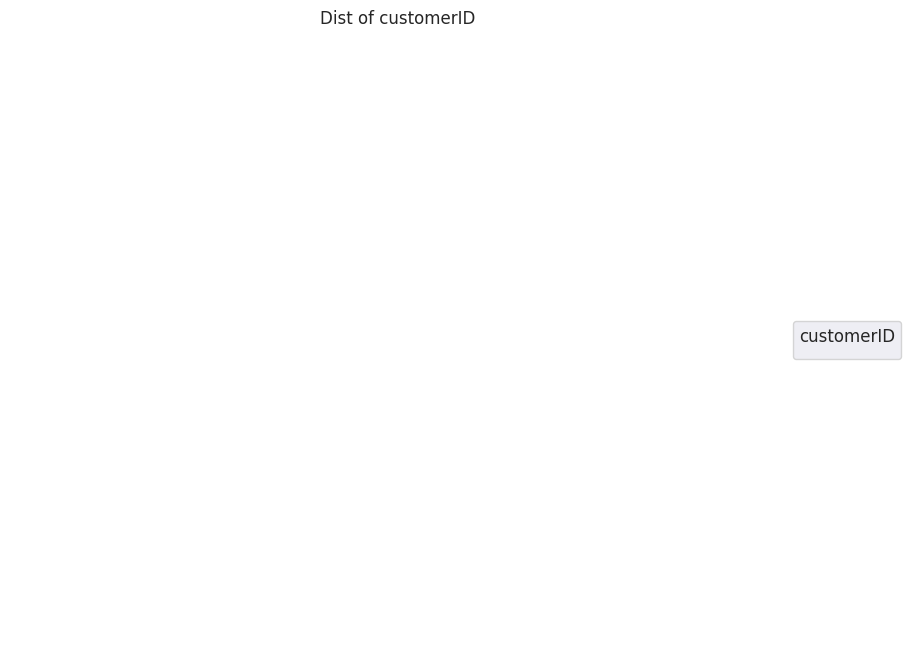

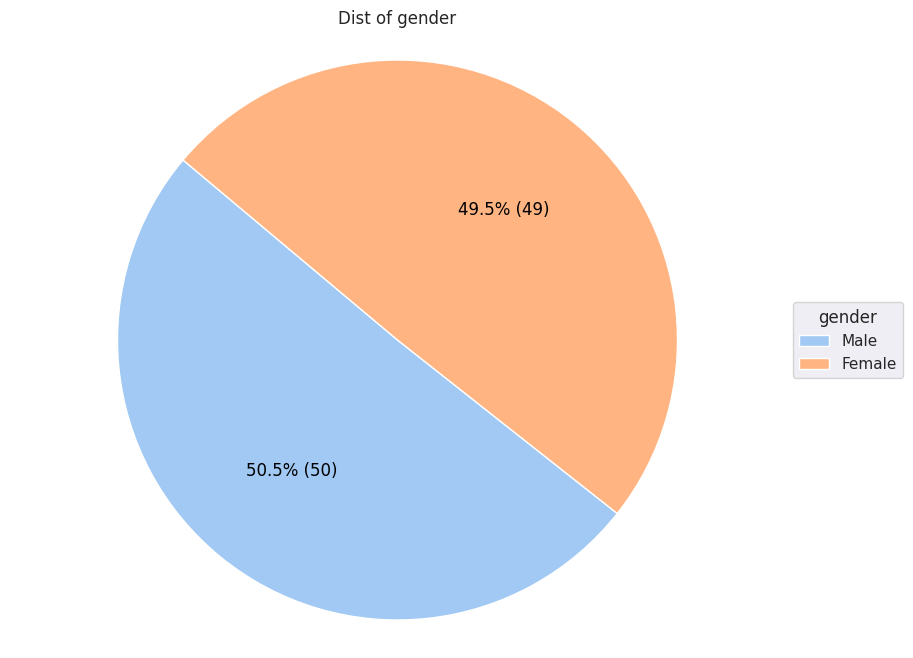

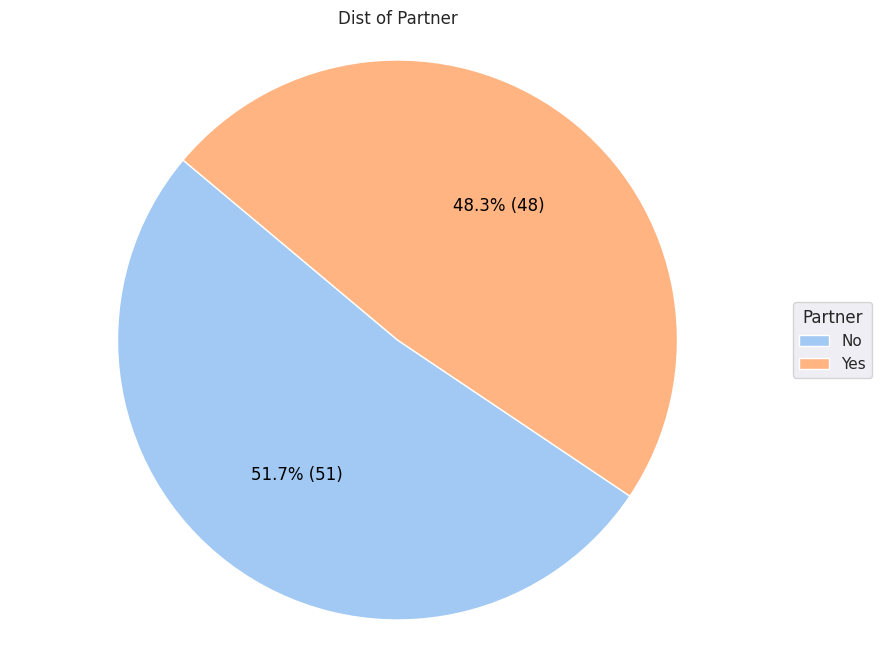

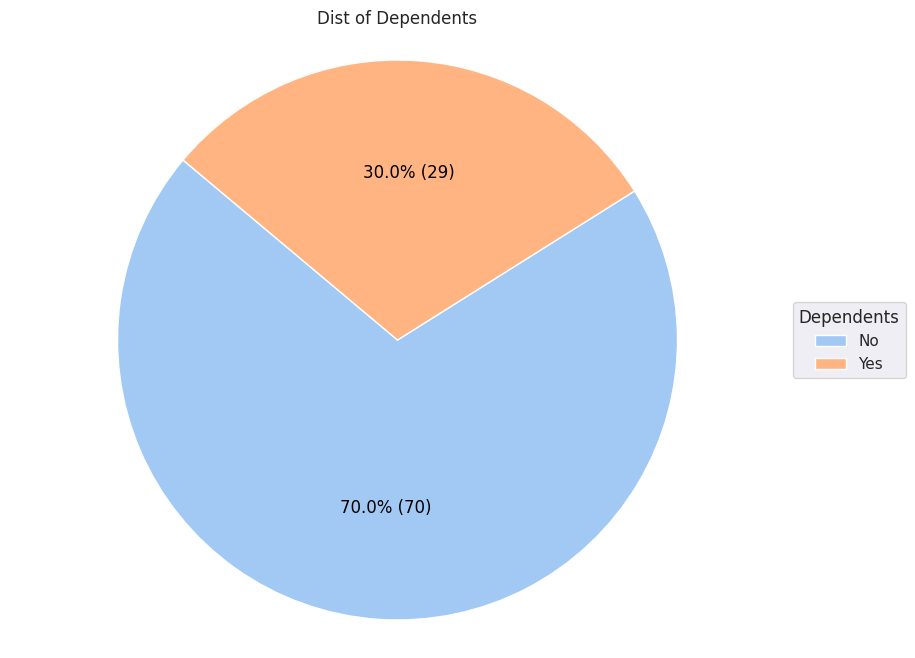

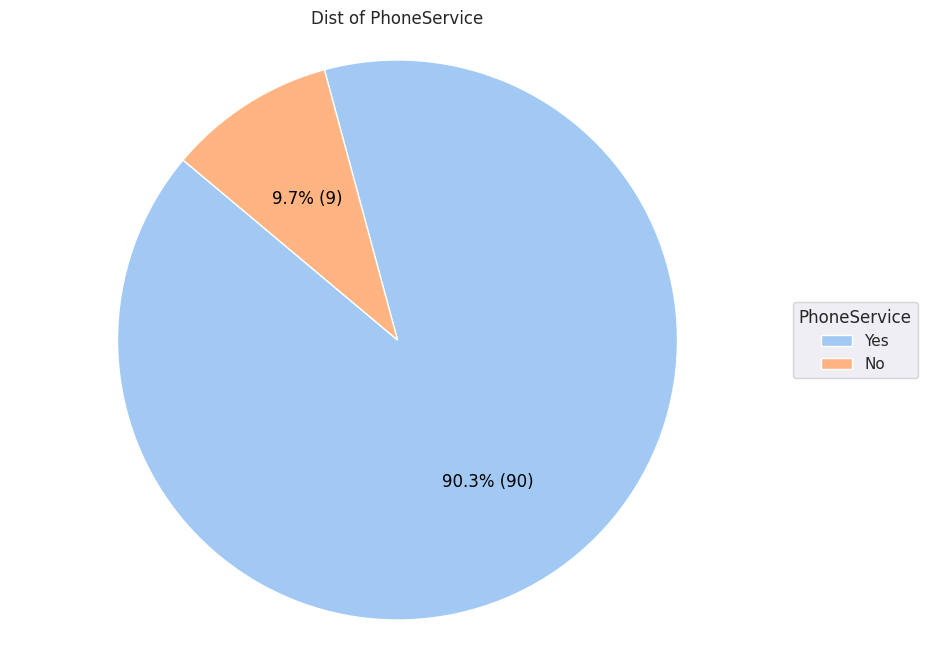

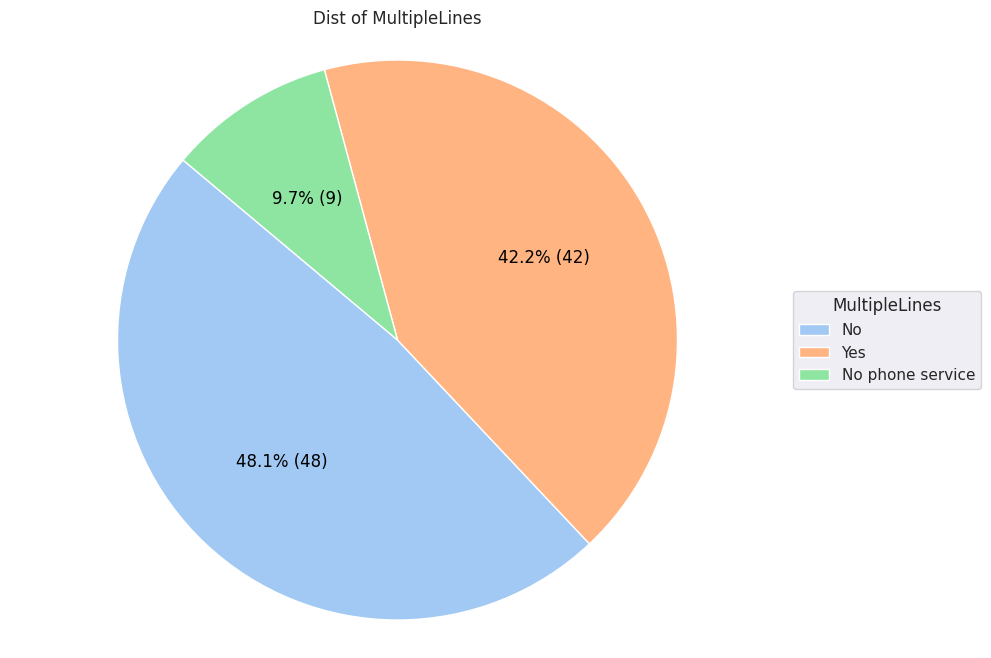

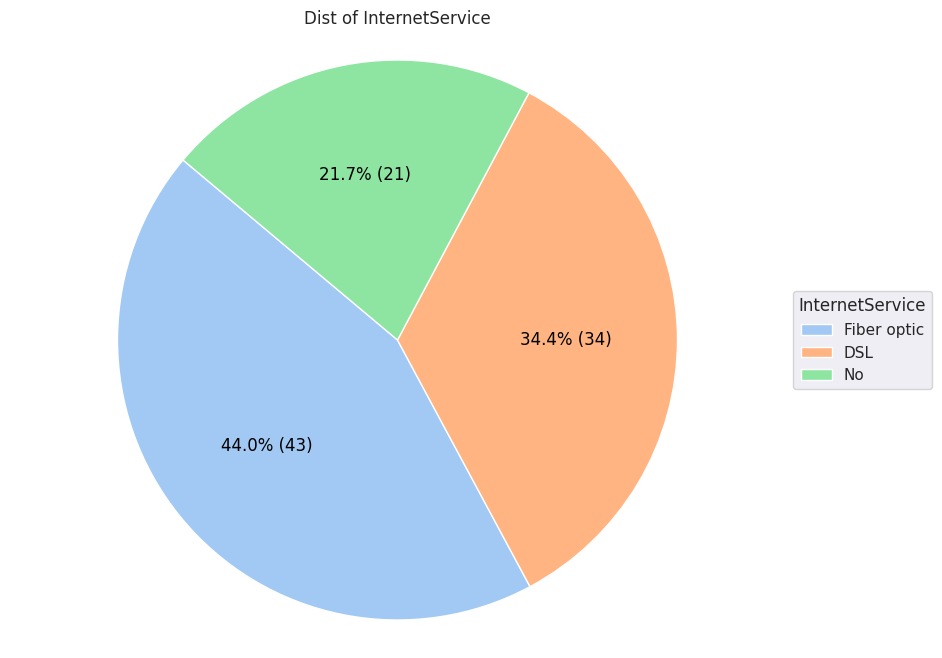

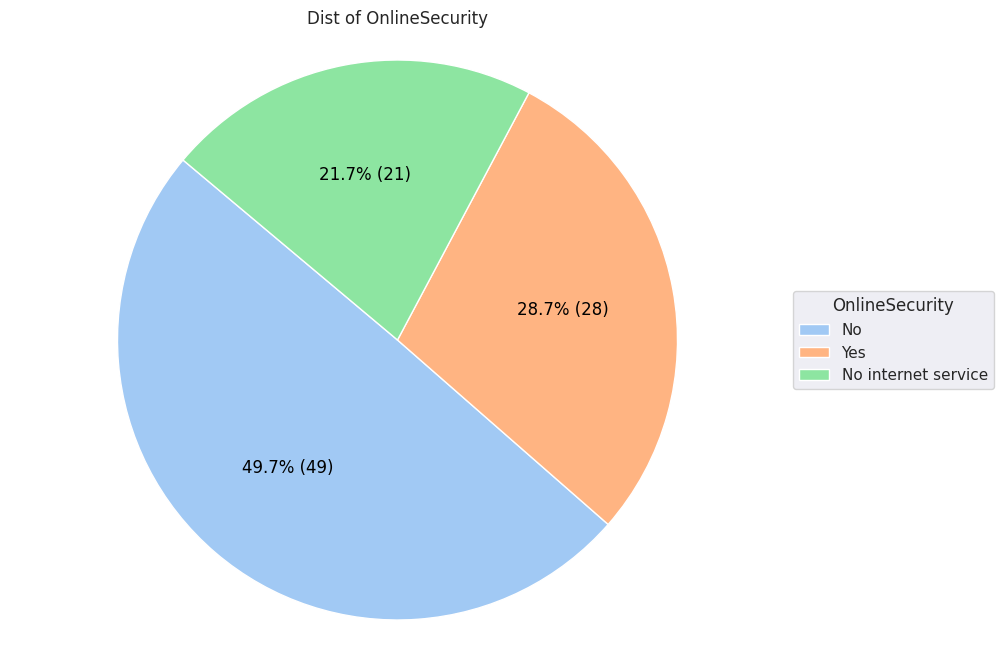

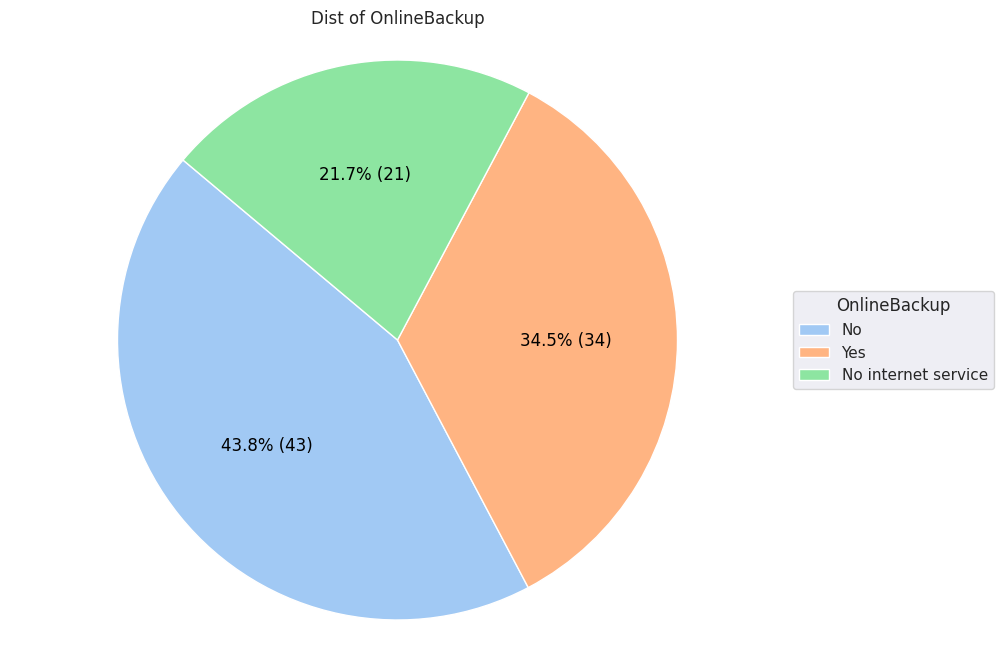

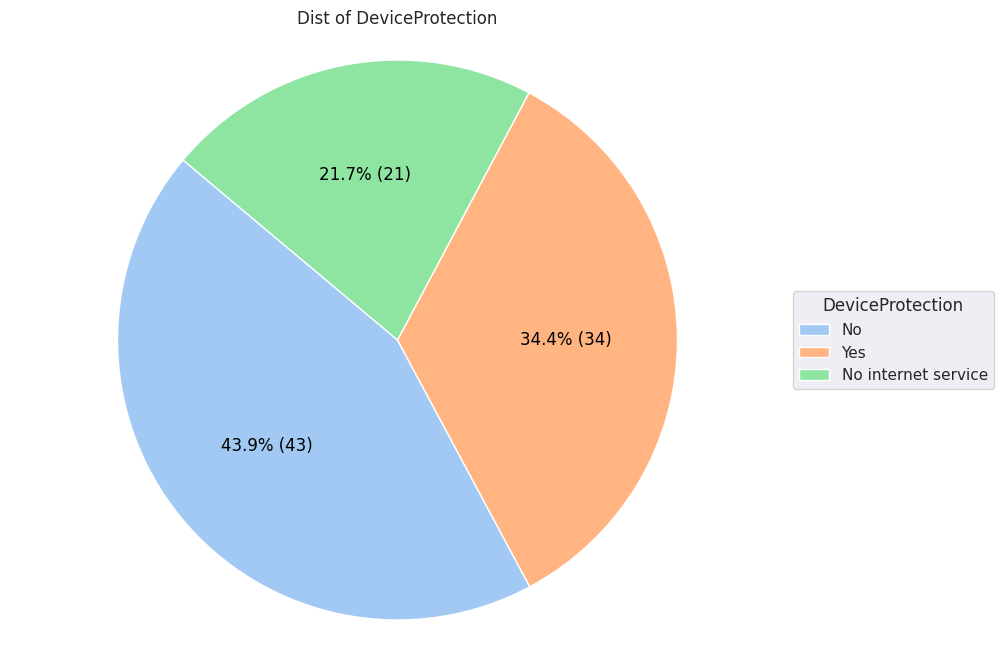

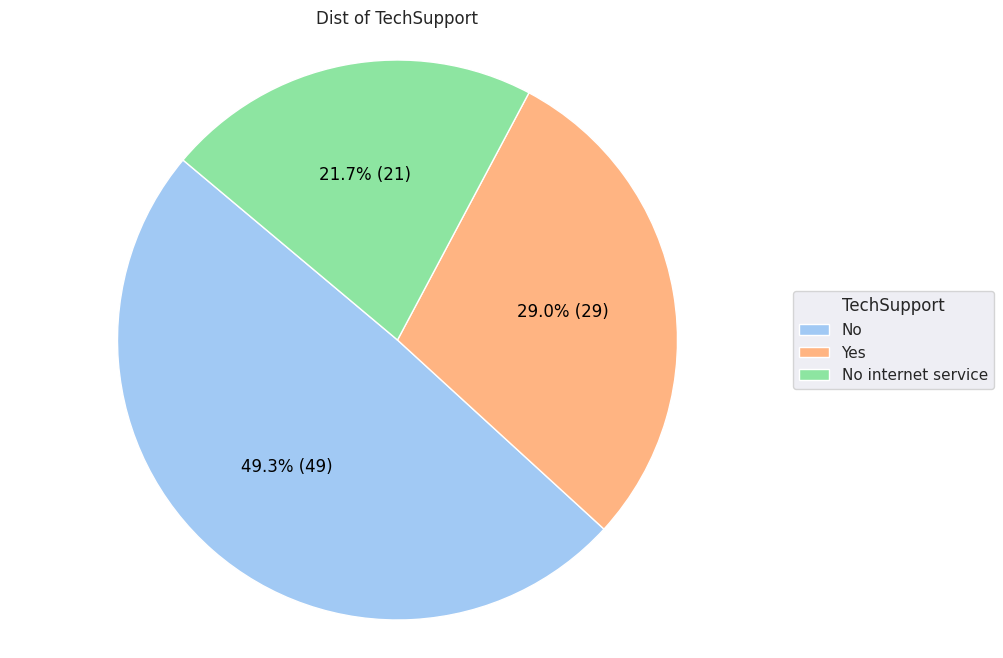

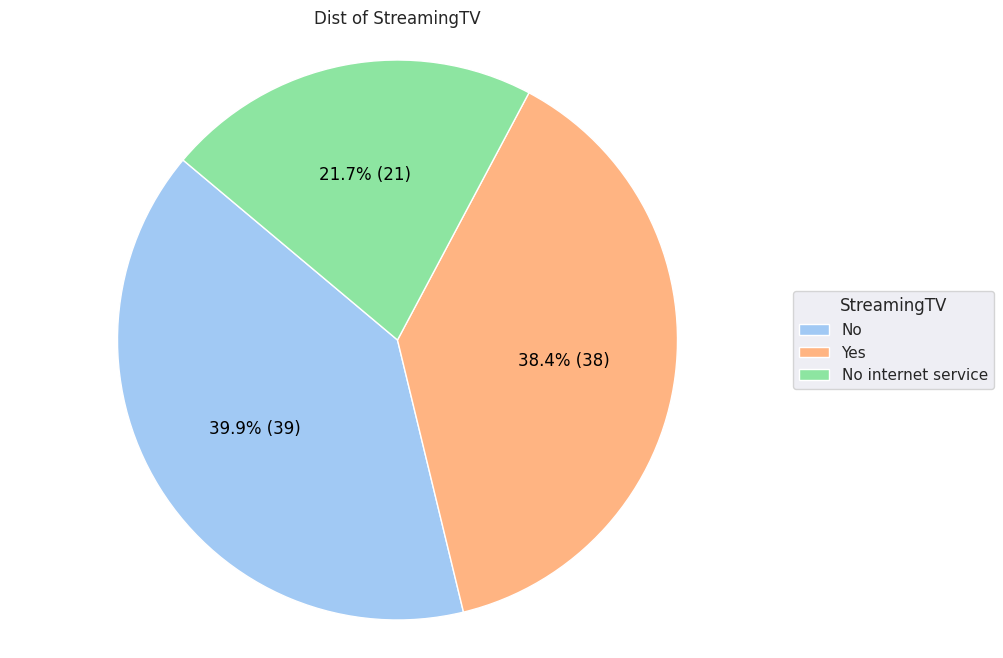

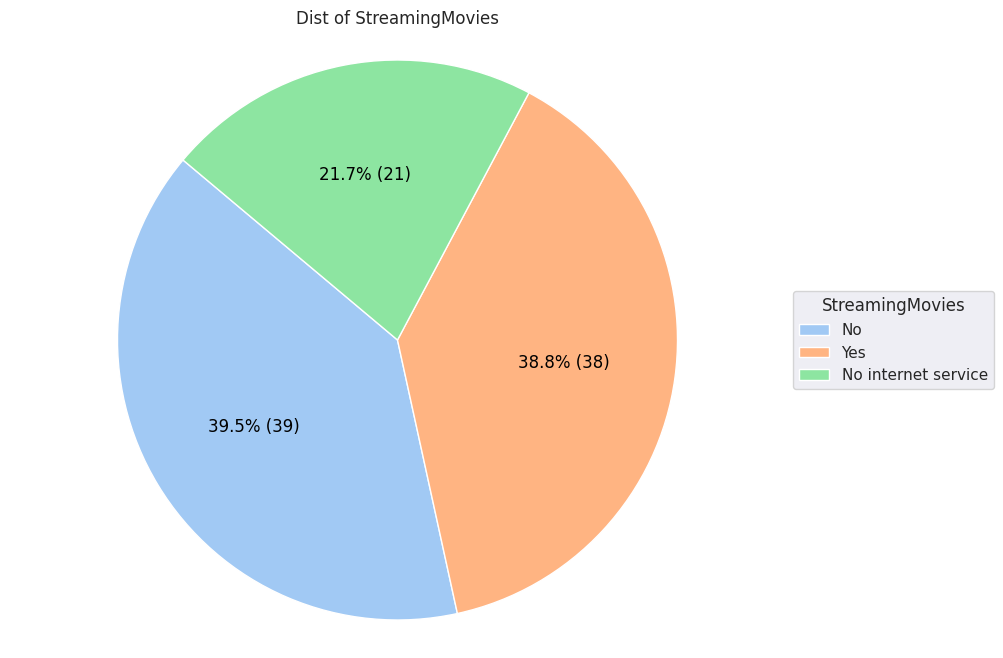

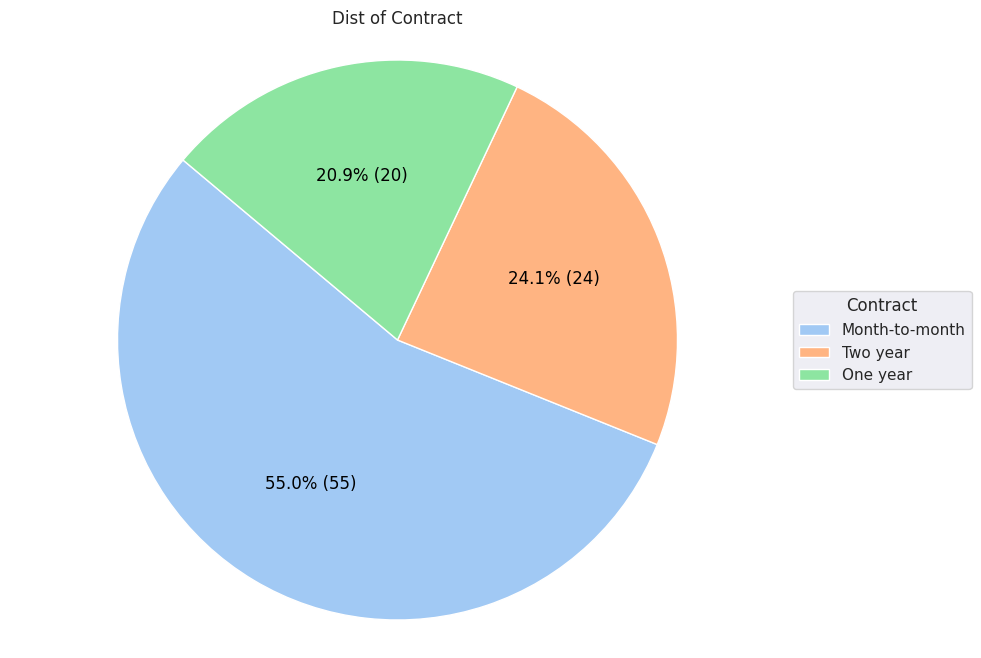

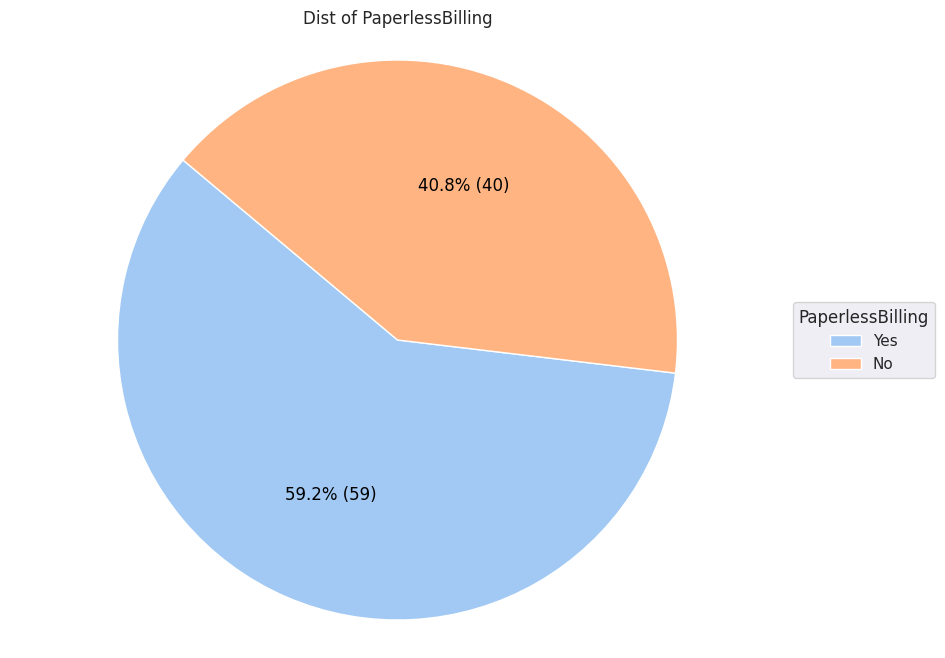

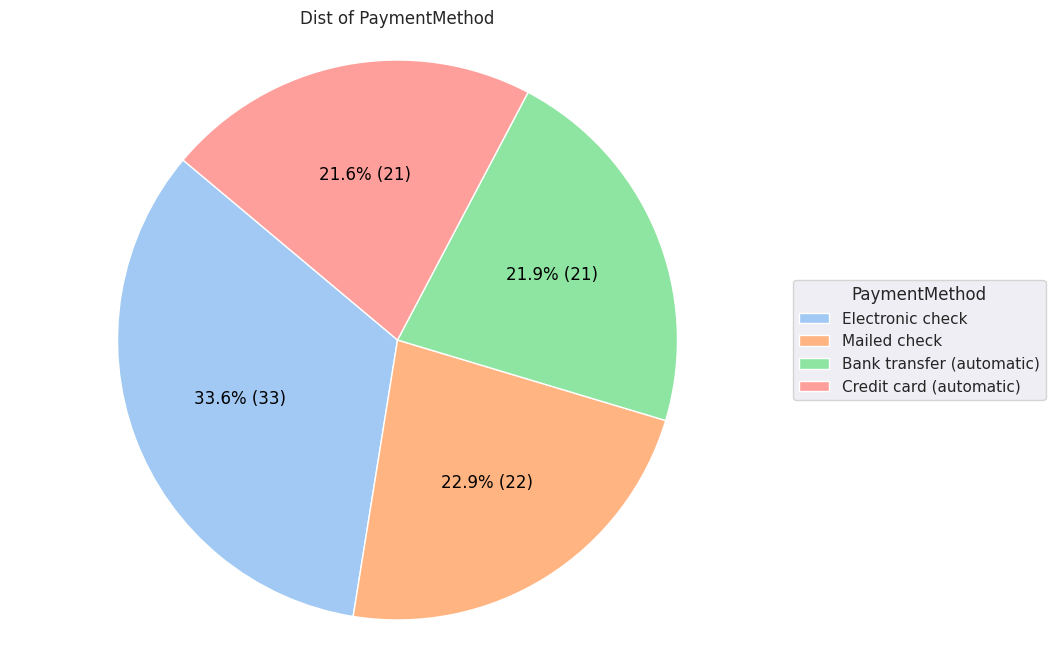

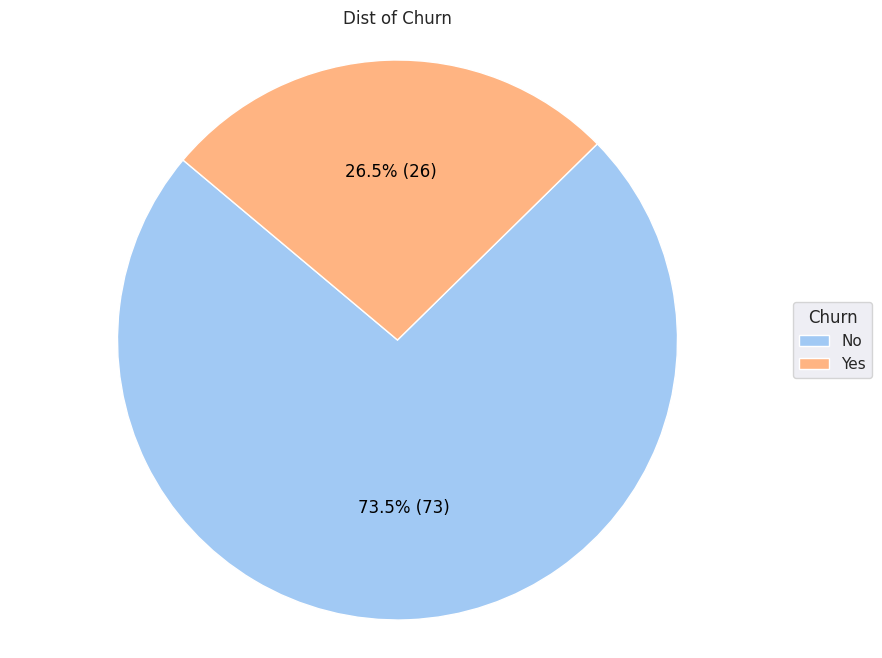

In [176]:
plot_categorical_pie_charts_sns(tel)

####Share Insights for Q2.c.:
Observations:
1. In the gender section the distribution is almost even which suggest men and women both use almost same amount of telecom services
2. The dependants use less services compared to non dependants
3. Almost 90 percent of the people use phone and remaining don't
4. People who use multiple lines and don't use multiple lines the distribution is almost equal. Which says people like to use more than one telecom service provider.
5. Mojarity of people use internet serivce
6. When it comes to online security people looks like doesn't seems to care more about it. Same goes for backup. Device protection, and Tech support
7. The observations tells that people do use internet service for streaming online content, but not by huge percentage. Some might prefer WIFI services for better streaming and uniterrupted streaming.
8. People seems to recharge or contract on monthly basis rather than yearly. Middle class or poor people will probably opt for month basis rather than yearly.
9. Most  of the billing is done online. Rather than visiting store etc.
10. Payment method is almost evenly distributed, suggesting people use the methods that suits them the best. But this should not be of any concern since payments are mostly done on time.
11. Most of the customers do not churn but some of them do, maybe because of lack of service, better offers, low prices etc.


####E. Encode all the appropriate Categorical features with the best suitable approach.

In [183]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [184]:
df = tel.copy() #creating a copy of data set

In [185]:
df_encoding = pd.get_dummies(df, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod'], dtype=int) #encoding unique values

In [186]:
df_encoding

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,Yes,No,1,No,No phone service,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,No,No,34,Yes,No,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,No,No,2,Yes,No,Yes,Yes,No,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,No,No,45,No,No phone service,Yes,No,Yes,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,No,No,2,Yes,No,No,No,No,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,0,Yes,Yes,11,No,No phone service,Yes,No,No,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,Yes,No,4,Yes,Yes,No,No,No,...,0,1,0,1,0,0,0,0,0,1


In [187]:
columns_to_check = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in columns_to_check:
    unique_values = df_encoding[column].unique()
    print(f"Unique values in '{column}' column:")
    print(unique_values)
    print("\n")

Unique values in 'MultipleLines' column:
['No phone service' 'No' 'Yes']


Unique values in 'OnlineSecurity' column:
['No' 'Yes' 'No internet service']


Unique values in 'OnlineBackup' column:
['Yes' 'No' 'No internet service']


Unique values in 'DeviceProtection' column:
['No' 'Yes' 'No internet service']


Unique values in 'TechSupport' column:
['No' 'Yes' 'No internet service']


Unique values in 'StreamingTV' column:
['No' 'Yes' 'No internet service']


Unique values in 'StreamingMovies' column:
['No' 'Yes' 'No internet service']




In [188]:
#we can see no phone service in multiple line which is no so we will change it to no. Same with onlinesecurity, onlinebackup, deviceprotection, tech support, streaming tv and streaming movies
df_encoding['MultipleLines'] = df_encoding['MultipleLines'].replace('No phone service', 'No')

columns_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in columns_to_replace:
    df_encoding.loc[:, column] = df_encoding[column].replace('No internet service', 'No')

In [189]:
df_encoding

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,Yes,No,1,No,No,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,No,No,34,Yes,No,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,No,No,2,Yes,No,Yes,Yes,No,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,No,No,45,No,No,Yes,No,Yes,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,No,No,2,Yes,No,No,No,No,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,0,Yes,Yes,11,No,No,Yes,No,No,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,Yes,No,4,Yes,Yes,No,No,No,...,0,1,0,1,0,0,0,0,0,1


In [190]:
# now lets replace other yes nd no columns with 1 and 0
df_encoding = df_encoding.replace({'Yes':1, 'No':0})

In [191]:
#checking for any null values
df_encoding.isna().sum()

customerID                                 0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_M

####F. Split the data into 80% train and 20% test.

In [192]:
df_encoding.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [193]:
#lets drop customerID before the split as its not useful for us any further
data = df_encoding.drop(columns='customerID', axis=1)

In [194]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

In [196]:
data_new = data.copy()

In [197]:
data_new.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X = data_new.drop('Churn', axis = 1)
y = data_new['Churn']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 27), (1409, 27), (5634,), (1409,))

####G. Normalize/Standardize the data with the best suitable approach.

In [202]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [203]:
# Features to scale
features_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = MinMaxScaler()

In [204]:
X_train_scaled = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled = scaler.transform(X_test[features_to_scale])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=features_to_scale, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_to_scale, index=X_test.index)

In [206]:
for col in features_to_scale:
    X_train[col] = X_train_scaled[col]
    X_test[col] = X_test_scaled[col]

In [207]:
print(X_train.head())  # Display the scaled training data
print(X_test.head())  # Display the scaled testing data

      SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
2142              0        0           1  0.291667             1   
1623              0        0           0  0.750000             1   
6074              0        1           0  0.013889             0   
1362              0        0           0  0.055556             1   
6754              0        0           1  0.000000             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
2142              0               1             0                 1   
1623              1               0             1                 0   
6074              0               0             0                 0   
1362              0               0             0                 0   
6754              1               1             1                 0   

      TechSupport  ...  InternetService_DSL  InternetService_Fiber optic  \
2142            0  ...                    1                            0   
1623        

###3. Model building and performance improvement

####A. Train a model using Decision tree and check the performance of the model on train and test data

In [210]:
from sklearn.tree import DecisionTreeClassifier

In [212]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [213]:
dt.score(X_train, y_train)
dt_pred = dt.predict(X_test)

In [214]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [216]:
accuracy = accuracy_score(y_test, dt_pred)
conf_matrix = confusion_matrix(y_test, dt_pred)
class_rep = classification_report(y_test, dt_pred)

In [234]:
print(f'Testing accuracy: {accuracy:.4f}')
print(f'Confusion Matrix: {conf_matrix}')
print('Classification Report:')
print(class_rep)

Testing accuracy: 0.7353
Confusion Matrix: [[847 189]
 [184 189]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.51      0.50       373

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



####B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

In [227]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'dt__criterion': ['gini', 'entropy'],'dt__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],'dt__min_samples_split': [2, 5, 10],'dt__min_samples_leaf': [1, 2, 4]}

In [228]:
dt = DecisionTreeClassifier()
pipe = Pipeline(steps=[('dt', dt)])  # Use a Pipeline for easier Grid Search

In [229]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [230]:
best_dt_model = grid_search.best_estimator_

In [241]:
# Evaluating on training data
y_train_pred = best_dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
class_rep = classification_report(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print("Training Classification Report:")
print(class_rep)

# Evaluate on testing data
y_test_pred = best_dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_rep = classification_report(y_test, y_test_pred)
print(f'\nTesting Accuracy: {test_accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print("\nTesting Classification Report:")
print(class_rep)

Training Accuracy: 0.7989
Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4138
           1       0.62      0.62      0.62      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.74      0.74      5634
weighted avg       0.80      0.80      0.80      5634


Testing Accuracy: 0.8027

Confusion Matrix:
[[889 147]
 [131 242]]

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1036
           1       0.62      0.65      0.64       373

    accuracy                           0.80      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.81      0.80      0.80      1409



Key Improvements After Grid Search:

1. Overall Accuracy: The most noticeable improvement is the increase in testing accuracy from 73.53% to 80.27%. This is a substantial gain, indicating that the model is now better at correctly predicting customer churn.

2. Precision for Class 1 (Churn): The precision for predicting churn (class 1) has improved significantly, going from 50% to 62%. This means that the model is now making fewer false positive predictions (predicting churn when it doesn't happen).

3. Recall for Class 1 (Churn): The recall for predicting churn has also seen a modest increase, from 51% to 65%. This means the model is now capturing more of the actual churn cases.

4. F1-Score for Class 1 (Churn):  The F1-score, which balances precision and recall, has increased from 50% to 64%. This indicates better overall performance in predicting the positive class (churn).

5. Confusion Matrix:  The confusion matrix reveals a reduction in both false positives and false negatives after grid search. This means the model is making fewer errors overall.

####C. Train a model using Random forest and check the performance of the model on train and test data

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating on training data
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluating on testing data
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'\nTesting Accuracy: {test_accuracy:.4f}')
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.9986
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634


Testing Accuracy: 0.7970
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



####D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

In [252]:
param_grid_rf = {'n_estimators': [50, 100, 150, 200],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [254]:
rf_model = RandomForestClassifier(random_state=42)

In [257]:
n_iter_search = 20  # Number of parameter settings sampled
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [258]:
best_rf_model = grid_search_rf.best_estimator_

In [259]:
# Evaluating on training data
y_train_pred = best_rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy (after Grid Search): {train_accuracy:.4f}')
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluating on testing data
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'\nTesting Accuracy (after Grid Search): {test_accuracy:.4f}')
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy (after Grid Search): 0.8461
Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4138
           1       0.77      0.60      0.67      1496

    accuracy                           0.85      5634
   macro avg       0.82      0.77      0.79      5634
weighted avg       0.84      0.85      0.84      5634


Testing Accuracy (after Grid Search): 0.8091
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



Before Grid Search:
1. Overfit: High training accuracy (99.86%), low testing accuracy (79.70%).
2. Churn Prediction: Moderate precision (0.66) and recall (0.49) for churn.

After Grid Search:
1. Less Overfitting: Training accuracy reduced to 84.61%, testing accuracy slightly increased to 80.91%.
2. Churn Prediction: Slightly better precision (0.69) and similar recall (0.51) for churn.

Key Differences:
1. Grid Search helped the model generalize better to new data.
2. Improvement in overall accuracy, but only marginal gains for churn prediction.

####E. Train a model using Adaboost and check the performance of the model on train and test data

In [260]:
from sklearn.ensemble import AdaBoostClassifier

In [261]:
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0, random_state=42)

In [262]:
ada_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [263]:
# Evaluating on training data
y_train_pred = ada_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluating on testing data
y_test_pred = ada_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'\nTesting Accuracy: {test_accuracy:.4f}')
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8055
Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4138
           1       0.67      0.52      0.59      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.71      0.73      5634
weighted avg       0.80      0.81      0.80      5634


Testing Accuracy: 0.8148
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



####F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f

In [264]:
param_grid_ada = {'n_estimators': [50, 100, 200],'learning_rate': [0.01, 0.1, 1.0],'base_estimator__max_depth': [1, 2]}

In [265]:
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [266]:
grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [1, 2],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [267]:
best_ada_model = grid_search_ada.best_estimator_

In [268]:
# Evaluating training data
y_train_pred = best_ada_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy (after Grid Search): {train_accuracy:.4f}')
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluating testing data
y_test_pred = best_ada_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'\nTesting Accuracy (after Grid Search): {test_accuracy:.4f}')
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy (after Grid Search): 0.8085
Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4138
           1       0.68      0.54      0.60      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634


Testing Accuracy (after Grid Search): 0.8155
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



Grid search on the AdaBoost model led to minor improvements:

Training Accuracy: Increased slightly from 80.55% to 80.85%.
Testing Accuracy: Increased slightly from 81.48% to 81.55%.
Churn Recall: Improved slightly, indicating better identification of churn cases.

Precision & F1-score for Churn: Remained relatively unchanged.
Overall, the improvements are small, suggesting that the default hyperparameters were already decent or that further tuning or different approaches might be needed to achieve greater gains.

####G. Train a model using GradientBoost and check the performance of the model on train and test data

In [269]:
from sklearn.ensemble import GradientBoostingClassifier

In [270]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [271]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [272]:
# Evaluating training data
y_train_pred = gb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluating testing data
y_test_pred = gb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'\nTesting Accuracy: {test_accuracy:.4f}')
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8241
Training Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4138
           1       0.72      0.55      0.63      1496

    accuracy                           0.82      5634
   macro avg       0.79      0.74      0.76      5634
weighted avg       0.82      0.82      0.82      5634


Testing Accuracy: 0.8105
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



####H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h

In [273]:
param_grid_gb = {'n_estimators': [50, 100, 150],'learning_rate': [0.01, 0.1, 0.2],'max_depth': [3, 4, 5],'subsample': [0.8, 1.0]}

In [274]:
gb_model = GradientBoostingClassifier(random_state=42)

In [275]:
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [276]:
best_gb_model = grid_search_gb.best_estimator_

In [277]:
# Evaluating training data
y_train_pred = best_gb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy (after Grid Search): {train_accuracy:.4f}')
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluating testing data
y_test_pred = best_gb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'\nTesting Accuracy (after Grid Search): {test_accuracy:.4f}')
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

print(f'Best parameters: {grid_search_gb.best_params_}')

Training Accuracy (after Grid Search): 0.8264
Training Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4138
           1       0.72      0.56      0.63      1496

    accuracy                           0.83      5634
   macro avg       0.79      0.74      0.76      5634
weighted avg       0.82      0.83      0.82      5634


Testing Accuracy (after Grid Search): 0.8112
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Grid Search led to very minor improvements in the Gradient Boosting model's performance:

Accuracy increased slightly on both training and testing data.
Recall for churn improved slightly, but precision and F1-score remained similar.

####I. Provide detailed analysis of the below steps

Model	Training Accuracy	Testing Accuracy	Key Differences
Decision Tree	99.86%	79.70%	High overfitting (large gap between train and test)

Random Forest	99.86%	79.70%	High overfitting (large gap between train and test)

AdaBoost	80.55%	81.48%	Slight overfitting, but good generalization on test set
AdaBoost (Tuned)	80.85%	81.55%	Very slight improvement after tuning

Gradient Boost	82.41%	81.05%	Slight overfitting, but good generalization on test set
Gradient Boost (Tuned)	82.64%	81.12%	Very slight improvement after tuning, slightly overfitting

Based purely on testing accuracy, the AdaBoost (after Grid Search) model performed slightly better than the others (81.55%). However, the differences in testing accuracy are very small between the tuned AdaBoost and Gradient Boosting models.

Final Conclusion:

The AdaBoost model (after Grid Search) shows marginally better performance than the other models in terms of testing accuracy. However, the differences are small, and all models (except the untuned Decision Tree and Random Forest) show a good balance between training and testing accuracy, indicating decent generalization.